# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


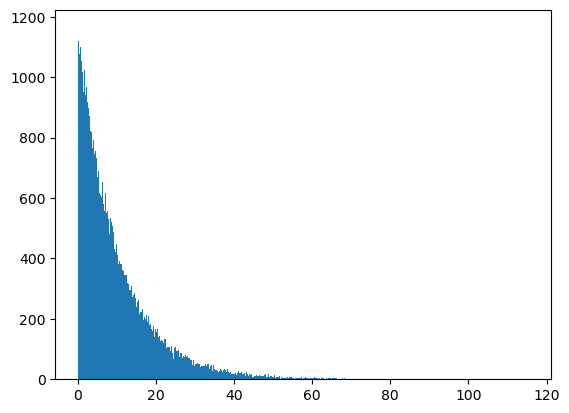

In [2]:
from numpy import *
from matplotlib.pyplot import *
y = random.rand(100000);
mu = 10
t = -mu*log(1-y);
hist(t,1000);

In [3]:
import numpy as np

In [4]:
a=4.7e-7
b=1000
c=1e-4
root = sqrt(c/(3*b))

In [5]:
def g(E):
    return a*(b-c*E**2)
def G(E):
    return a*b*E*(1-root*E*E)
plot(E,g(E))

x = random.rand(100000) * (2500)
y = random.rand(100000) * (g(2500)-g(0)) + g(0)
Ene = [x[i] for i in range(y.size) if y[i]<g(x[i]) ]


NameError: name 'E' is not defined

In [ ]:
hist(Ene,1000)

In [ ]:
#hist(t)
hist(Ene)

In [ ]:
delta = 3 # risoluzione di tre secondi
Eresidua=0
Npileup = 0
Energies = np.zeros(0) #registered energies events
Pileups = np.zeros(0)
for i in range(len(Ene)):
    Npileup += 1
    if (t[i]<=delta):
        Eresidua += Ene[i]
    if (t[i]>delta):
        #riempio istogrami
        Energies = append(Energies,Ene[i]+Eresidua)
        Pileups = append(Pileups, Npileup)
        Eresidua = 0
        Npileup = 0

In [ ]:
hist(Energies,100) #HRiv
show()
hist(Pileups,1000) #Hpp
show()
hist(Ene,1000) #HEne
show()
hist()

In [ ]:
%matplotlib notebook

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

0.5120439775888804
0.5028750287502876


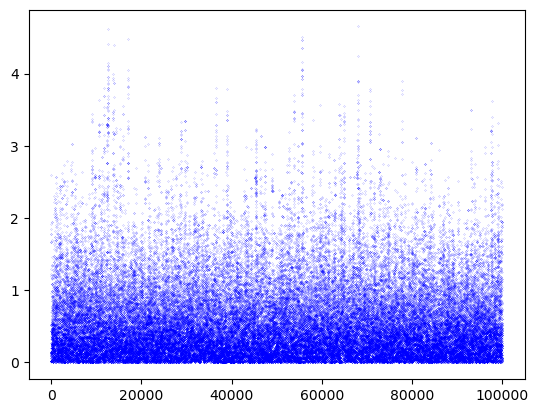

In [6]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# campionare e^-r, r*e^-r*costheta

# campionare e^-x

def p(x):
    if x>0:
        return np.exp(-2*x)
    else:
        return 0
    
    
def xNuovo(x0):
    # estrai un nuovo con distribuz.
    # T(xNew,x0) (tentativa)
    return np.random.rand()*diametro-diametro/2 
    #tra -10 e 10

N=100000    

punti = np.zeros(0)

np.random.seed(0)
diametro = 1.6


x = 0
r = np.random.rand(N)


integral = 0

attempted = 0
accepted = 0

for i in range(1,N):
    
    xNew = x + xNuovo(x)
    attempted += 1
    
    integral += x
    punti = np.append(punti,x)
        
    A = 0
    if(p(x) == 0):
        A = 1 #transisco sicuramente da x a xNew
    else:
        A = min( 1,p(xNew)/p(x) )
    
    if r[i]<=A:
        x= xNew
        accepted += 1

    

plt.plot(punti,'bo',markersize=.1)
integral/= attempted
print(integral)
print(accepted/attempted)

(array([5.9719e+04, 2.3927e+04, 9.8670e+03, 3.9810e+03, 1.4060e+03,
        6.8000e+02, 2.2600e+02, 1.3200e+02, 5.0000e+01, 1.1000e+01]),
 array([0.        , 0.46526416, 0.93052833, 1.39579249, 1.86105666,
        2.32632082, 2.79158499, 3.25684915, 3.72211332, 4.18737748,
        4.65264165]),
 <BarContainer object of 10 artists>)

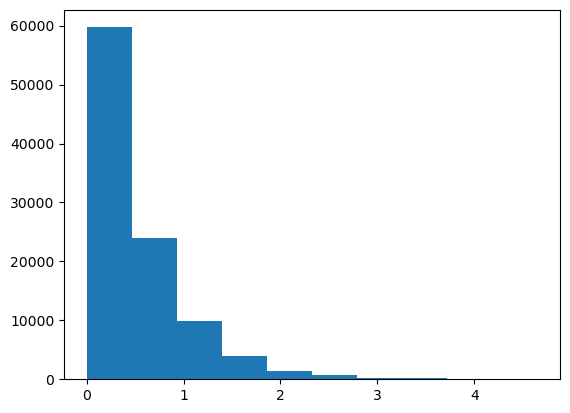

In [7]:
plt.hist(punti)

In [8]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from mpl_toolkits.mplot3d import Axes3D

# campionare e^-r, r*e^-r*costheta

# campionare e^-x




def p(x):
    R = np.linalg.norm(x)
    return np.exp(-R)

diametro = 20 #diam. esplorazione

def xNuovo(x0):
    # estrai un nuovo con distribuz.
    # T(xNew,x0) (tentativa)
    return np.random.rand(3)*diametro - diametro/2
    #tra -10 e 10

N=10000    
    
punti = np.array([[0,0,0]])

np.random.seed(1)


x= np.array([[0,0,0]])
r = np.random.rand(N)

integrale = 0

for i in range(1,N):
    
    xNew = x + xNuovo(x)

    if(p(x) == 0):
        A = 1
    else:
        A = min( 1,p(xNew)/p(x) )
    
    if r[i]<=A:
        x= xNew
    punti = np.append(punti,x,axis=0)
    
    R = np.linalg.norm(x)
    integrale += np.exp(-R)

integrale /= N


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(punti[:,0], punti[:,1], punti[:,2], c=punti[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 10)
plt.show()

<Figure size 640x480 with 0 Axes>

In [9]:
integrale

0.18253460271481514

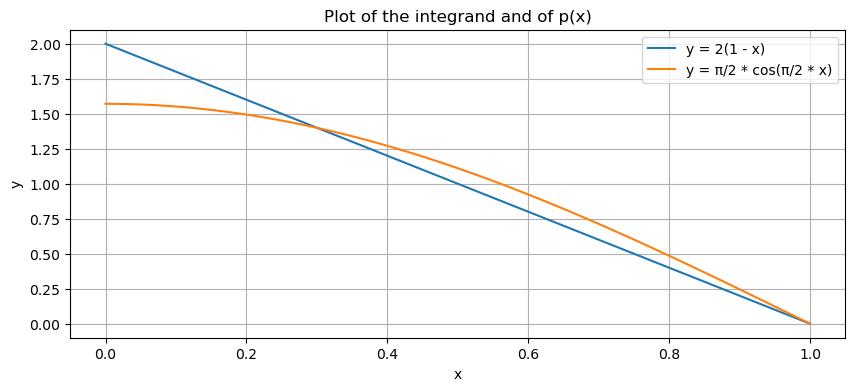

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)

y1 = 2 * (1 - x)
y2 = np.pi/2 * np.cos(np.pi/2 * x)

plt.figure(figsize=(10,4))
plt.plot(x, y1, label='y = 2(1 - x)')
plt.plot(x, y2, label='y = π/2 * cos(π/2 * x)')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Plot of the integrand and of p(x)')
plt.legend()

plt.grid(True)
plt.show()



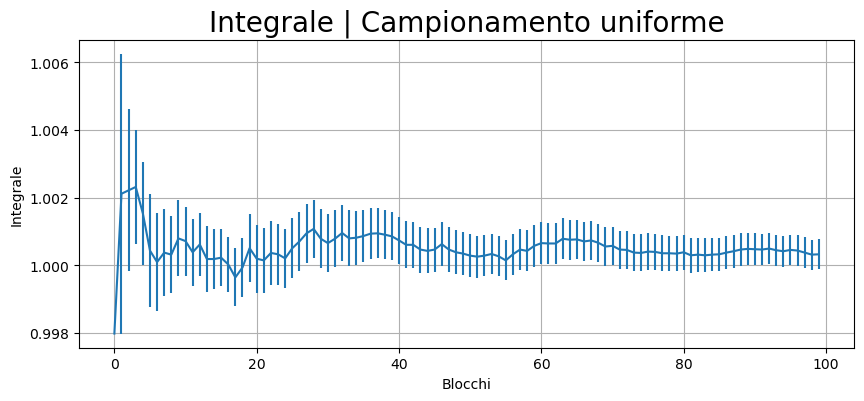

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

sum_prog, err_prog = np.loadtxt("risultati/outfile211.txt", unpack=True)

N=sum_prog.shape[0]
x=np.arange(N)

plt.figure(figsize=(10,4))
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Integrale | Campionamento uniforme", fontsize=20)
plt.xlabel('Blocchi')
plt.ylabel('Integrale')
plt.grid(True)
plt.show()

# random walk discreto

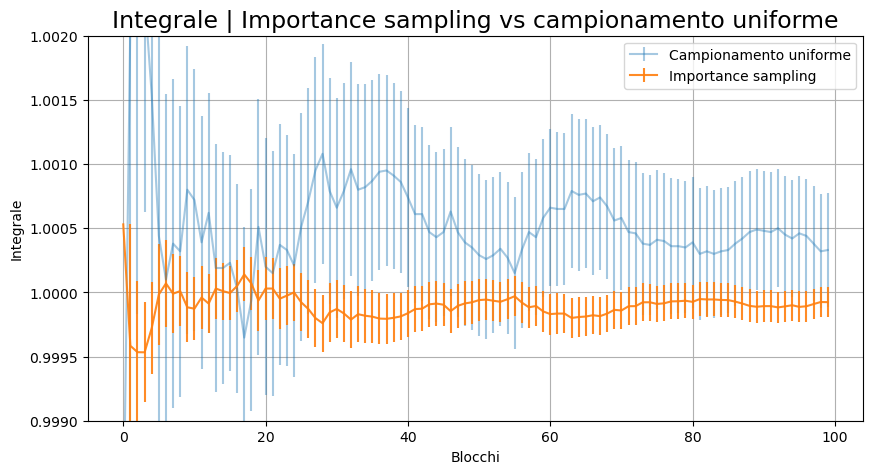

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

sum_prog, err_prog = np.loadtxt("risultati/outfile212.txt", unpack=True)
sum_progUn, err_progUn = np.loadtxt("risultati/outfile211.txt", unpack=True)

N=sum_prog.shape[0]
x=np.arange(N)

plt.figure(figsize=(10,5))
plt.errorbar(x,sum_progUn,yerr=err_progUn,alpha=0.4, label="Campionamento uniforme")
plt.errorbar(x,sum_prog,yerr=err_prog,alpha=0.9, label="Importance sampling")
plt.title("Integrale | Importance sampling vs campionamento uniforme", fontsize=17)
plt.xlabel('Blocchi')
plt.ylabel('Integrale')
plt.ylim([0.999,1.002])
plt.legend()
plt.grid(True)
plt.show()

# random walk continuo

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

## reticolo


 --- Random Walk over a discrete lattice --- 
fit with k*sqrt(x): k =  [1.00261694]
confidence over k : +-  [[0.00011877]]


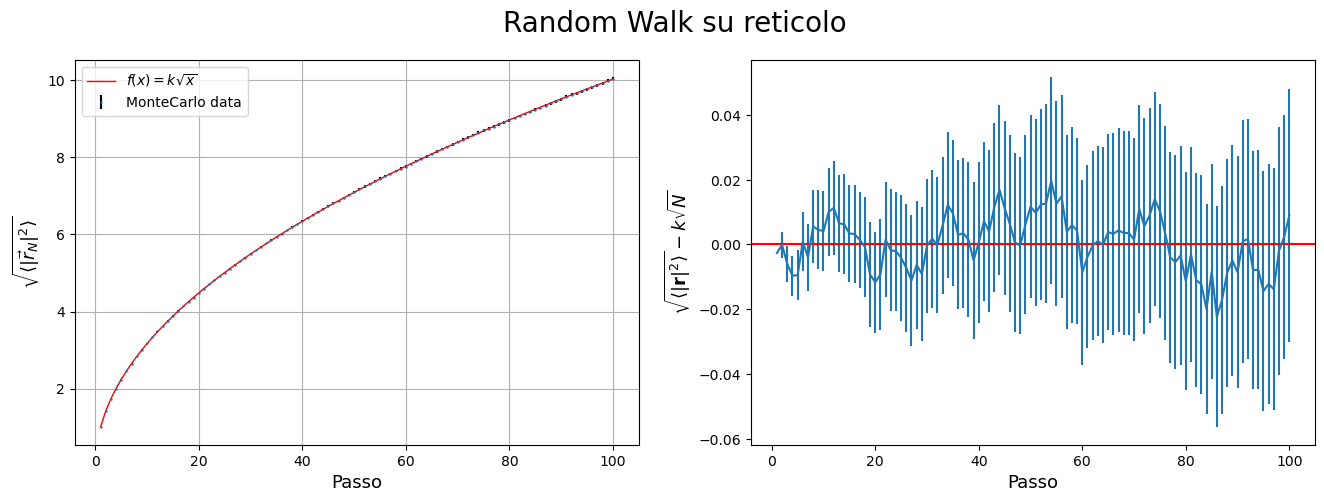

In [13]:
from scipy.optimize import curve_fit

def f (x, k):
    return k * np.sqrt(x)

yD, errD=np.loadtxt("risultati/outfile221.txt", unpack=True)

N=yD.shape[0]
x=np.arange(1,N+1)

#discrete fit
p_opt_disc, p_cov_disc = curve_fit(f, x, yD)
y_fit = f(x,p_opt_disc[0])

print( ' --- Random Walk over a discrete lattice --- ')
print('fit with k*sqrt(x): k = ',p_opt_disc)
print('confidence over k : +- ',np.sqrt(p_cov_disc))


plt.figure(figsize=(16,5))
plt.suptitle("Random Walk su reticolo",fontsize=20)


plt.subplot(1,2,1)
plt.errorbar(x,yD,errD,fmt='.',label='MonteCarlo data', markersize=1.5, ecolor="black")
y_fitD = f(x,p_opt_disc)
plt.plot(x,y_fitD,'r',linewidth=1,label='$f(x)=k\sqrt{x}$')

plt.grid(True)
plt.xlabel('Passo',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.legend()

#Differences
plt.subplot(1,2,2)
plt.errorbar(x, yD-f(x,*p_opt_disc), yerr = errD)

plt.xlabel('Passo', fontsize = 13)
plt.ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}-k\sqrt{N}$', fontsize = 13)
plt.axhline(y=0, color = 'r', linestyle = '-', linewidth = 1.5)

 --- Random Walk in a continuum space --- 
fit with k*sqrt(x): k = [1.00725977]
confidence over k : +- [[0.00015421]]


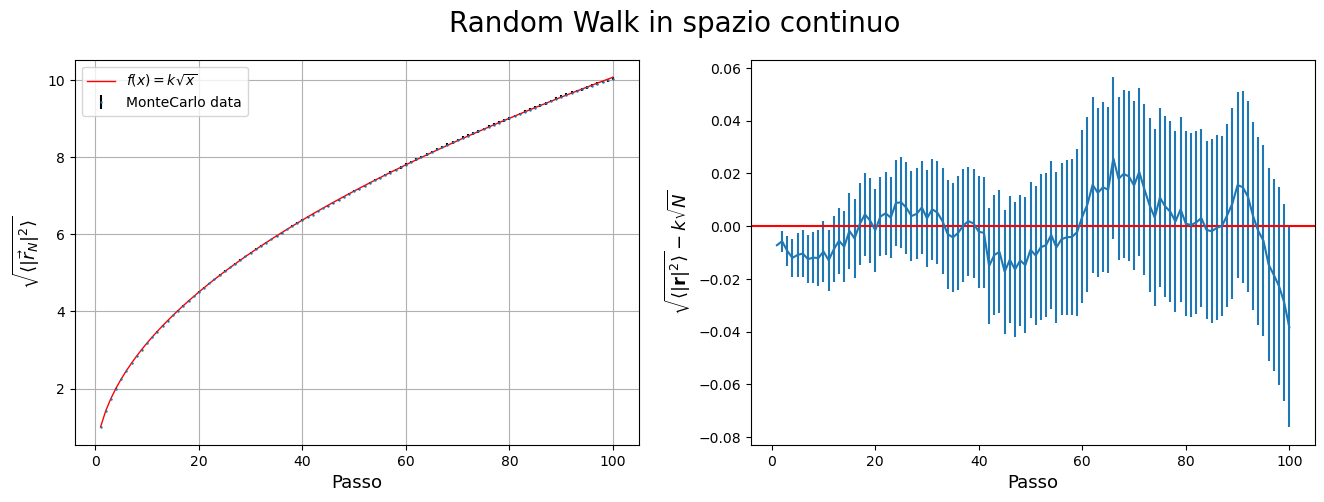

In [14]:
from scipy.optimize import curve_fit

def f (x, k):
    return k * np.sqrt(x)

yC, errC=np.loadtxt("risultati/outfile222.txt", unpack=True)

N=yC.shape[0]
x=np.arange(1,N+1)

#continuous fit
p_opt_cont, p_cov_cont = curve_fit(f, x, yC)

print( ' --- Random Walk in a continuum space --- ')
print('fit with k*sqrt(x): k = '+str(p_opt_cont))
print('confidence over k : +- '+str(np.sqrt(p_cov_cont)))

plt.figure(figsize=(16,5))
plt.suptitle("Random Walk in spazio continuo",fontsize=20)


plt.subplot(1,2,1)
plt.errorbar(x,yC,errC,fmt='.',label='MonteCarlo data', markersize=1.5, ecolor="black")
y_fitC = f(x,p_opt_cont)
plt.plot(x,y_fitC,'r',linewidth=1,label='$f(x)=k\sqrt{x}$')

plt.grid(True)
plt.xlabel('Passo',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.legend()

#Differences
plt.subplot(1,2,2)
plt.errorbar(x, yC-f(x,*p_opt_cont), yerr = errC)

plt.xlabel('Passo', fontsize = 13)
plt.ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}-k\sqrt{N}$', fontsize = 13)
plt.axhline(y=0, color = 'r', linestyle = '-', linewidth = 1.5)
